# Reinforcement Learning 1
## Value Iteration (model-based) vs. TD (exploratory learning)
In this notebook, I explore into the dynamics of value function convergence within the framework of reinforcement learning, focusing on a simple yet illustrative example: a random walk. The essence of reinforcement learning is to make strategic decisions; to understand and optimize these decisions, we need to grasp how value functions evolve. This notebook serves as a practical investigation into this process.

### Setup and Initial Observations
This approach begins with the initialization of value estimates for a system modeled as a random walk. Here, the environment is conceptualized as a series of states, with two terminal states representing the start (A) and goal (G). The value of each state is initially unknown, except for the terminal states, where the goal (G) holds a predefined reward.


```javascript
0           0         0          0         0          0          1
s1 ------- s2 ------- s3 ------- s4------- s5 ------- s6 ------- s7
    |         |         |         |         |         |
   0.0       0.5       0.5       0.5       0.5       1.0
    |         |         |         |         |         |
    \_____/   \_____/   \_____/   \_____/   \_____/   \_____/
      50%       50%       50%       50%       50%       50%
```

The objective is: to iteratively update the value estimates for each state based on the outcomes of possible actions (moving left or right), aiming for convergence to an optimal set of values that reflect the expected returns from each state.

### Methodology
To capture the nuances of this process, I employ data structures to log the changes in value estimates and the deltas between iterations, providing a clear picture of the convergence process.

```python
Deltas=pd.DataFrame(columns=['s1','s2','s3', 's4','s5','s6', 's7'], index=range(20))
Values=pd.DataFrame(columns=['s1','s2','s3', 's4','s5','s6', 's7'], index=range(20))
valuesTD=pd.DataFrame(columns=['s1','s2','s3', 's4','s5','s6', 's7'], index=range(30))

```

Through a series of episodes, the values are updated, and the differences (deltas) from one iteration to the next are meticulously recorded. This approach not only illustrates the path to convergence but also sheds light on the efficiency and characteristics of the learning process in model-based and model-free reinforcement learning scenarios.

### Visualization and Insights
My exploration culminates in a visual analysis, employing seaborn and matplotlib to graphically represent the convergence of value functions and the trajectory of changes across episodes. These visualizations were critical to my ability of interpreting the behavior of the learning process and understanding the underlying mechanics of reinforcement learning.<br><br>

In [74]:
import numpy as np
import pandas as pd

# Number of states excluding the terminal states
n = 5

# Initialize value estimates, with state 0 and 6 (s1 and s7) as terminal states with known rewards
V = np.zeros(n + 2)
display(f'empty V: {V}')
V[n + 1] = 1
display(f'intial V: {V}')
print()

Deltas=pd.DataFrame(columns=['s1','s2','s3', 's4','s5','s6', 's7'], index=range(20))
Values=pd.DataFrame(columns=['s1','s2','s3', 's4','s5','s6', 's7'], index=range(20))


# Since it's a random walk, the transition probability is 0.5 for left and right
# and there's no discounting (gamma = 1), we can directly calculate the values

for e in range(20):  # iterate the process enough times to reach convergence
    
    display(f'episode: {e}')
    
    V_old = V.copy()
    
    print()
    
    for s in range(1, n + 1): # go from index 0 up to max 5 or V[s+1] will run error

       
        V[s] = 0.5 * (V[s - 1] + V[s + 1])
        

    Deltas.loc[e] = np.abs(V_old - V)
    Values.loc[e] = V
    
    display(f'Final V for Episode{e}:                {V}')
    display(f'Final Absolute Deltas for Episode {e}: {np.abs(V_old - V)}')



# Extract and return the values excluding the terminal states
value_iterations = V[1:-1]
value_iterations


'empty V: [0. 0. 0. 0. 0. 0. 0.]'

'intial V: [0. 0. 0. 0. 0. 0. 1.]'

'episode: 0'

'Final V for Episode0:                [0.  0.  0.  0.  0.  0.5 1. ]'

'Final Absolute Deltas for Episode 0: [0.  0.  0.  0.  0.  0.5 0. ]'

'episode: 1'

'Final V for Episode1:                [0.    0.    0.    0.    0.25  0.625 1.   ]'

'Final Absolute Deltas for Episode 1: [0.    0.    0.    0.    0.25  0.125 0.   ]'

'episode: 2'

'Final V for Episode2:                [0.     0.     0.     0.125  0.375  0.6875 1.    ]'

'Final Absolute Deltas for Episode 2: [0.     0.     0.     0.125  0.125  0.0625 0.    ]'

'episode: 3'

'Final V for Episode3:                [0.        0.        0.0625    0.21875   0.453125  0.7265625 1.       ]'

'Final Absolute Deltas for Episode 3: [0.        0.        0.0625    0.09375   0.078125  0.0390625 0.       ]'

'episode: 4'

'Final V for Episode4:                [0.         0.03125    0.125      0.2890625  0.5078125  0.75390625\n 1.        ]'

'Final Absolute Deltas for Episode 4: [0.         0.03125    0.0625     0.0703125  0.0546875  0.02734375\n 0.        ]'

'episode: 5'

'Final V for Episode5:                [0.         0.0625     0.17578125 0.34179688 0.54785156 0.77392578\n 1.        ]'

'Final Absolute Deltas for Episode 5: [0.         0.03125    0.05078125 0.05273438 0.04003906 0.02001953\n 0.        ]'

'episode: 6'

'Final V for Episode6:                [0.         0.08789062 0.21484375 0.38134766 0.57763672 0.78881836\n 1.        ]'

'Final Absolute Deltas for Episode 6: [0.         0.02539062 0.0390625  0.03955078 0.02978516 0.01489258\n 0.        ]'

'episode: 7'

'Final V for Episode7:                [0.         0.10742188 0.24438477 0.41101074 0.59991455 0.79995728\n 1.        ]'

'Final Absolute Deltas for Episode 7: [0.         0.01953125 0.02954102 0.02966309 0.02227783 0.01113892\n 0.        ]'

'episode: 8'

'Final V for Episode8:                [0.         0.12219238 0.26660156 0.43325806 0.61660767 0.80830383\n 1.        ]'

'Final Absolute Deltas for Episode 8: [0.         0.01477051 0.0222168  0.02224731 0.01669312 0.00834656\n 0.        ]'

'episode: 9'

'Final V for Episode9:                [0.         0.13330078 0.28327942 0.44994354 0.62912369 0.81456184\n 1.        ]'

'Final Absolute Deltas for Episode 9: [0.         0.0111084  0.01667786 0.01668549 0.01251602 0.00625801\n 0.        ]'

'episode: 10'

'Final V for Episode10:                [0.         0.14163971 0.29579163 0.46245766 0.63850975 0.81925488\n 1.        ]'

'Final Absolute Deltas for Episode 10: [0.         0.00833893 0.01251221 0.01251411 0.00938606 0.00469303\n 0.        ]'

'episode: 11'

'Final V for Episode11:                [0.         0.14789581 0.30517673 0.47184324 0.64554906 0.82277453\n 1.        ]'

'Final Absolute Deltas for Episode 11: [0.         0.0062561  0.00938511 0.00938559 0.00703931 0.00351965\n 0.        ]'

'episode: 12'

'Final V for Episode12:                [0.         0.15258837 0.31221581 0.47888243 0.65082848 0.82541424\n 1.        ]'

'Final Absolute Deltas for Episode 12: [0.         0.00469255 0.00703907 0.00703919 0.00527942 0.00263971\n 0.        ]'

'episode: 13'

'Final V for Episode13:                [0.         0.1561079  0.31749517 0.48416182 0.65478803 0.82739402\n 1.        ]'

'Final Absolute Deltas for Episode 13: [0.         0.00351954 0.00527936 0.00527939 0.00395955 0.00197978\n 0.        ]'

'episode: 14'

'Final V for Episode14:                [0.         0.15874758 0.3214547  0.48812137 0.65775769 0.82887885\n 1.        ]'

'Final Absolute Deltas for Episode 14: [0.         0.00263968 0.00395954 0.00395954 0.00296966 0.00148483\n 0.        ]'

'episode: 15'

'Final V for Episode15:                [0.         0.16072735 0.32442436 0.49109103 0.65998494 0.82999247\n 1.        ]'

'Final Absolute Deltas for Episode 15: [0.         0.00197977 0.00296966 0.00296966 0.00222724 0.00111362\n 0.        ]'

'episode: 16'

'Final V for Episode16:                [0.         0.16221218 0.3266516  0.49331827 0.66165537 0.83082768\n 1.        ]'

'Final Absolute Deltas for Episode 16: [0.         0.00148483 0.00222724 0.00222724 0.00167043 0.00083522\n 0.        ]'

'episode: 17'

'Final V for Episode17:                [0.         0.1633258  0.32832204 0.4949887  0.66290819 0.8314541\n 1.        ]'

'Final Absolute Deltas for Episode 17: [0.         0.00111362 0.00167043 0.00167043 0.00125282 0.00062641\n 0.        ]'

'episode: 18'

'Final V for Episode18:                [0.         0.16416102 0.32957486 0.49624153 0.66384781 0.83192391\n 1.        ]'

'Final Absolute Deltas for Episode 18: [0.         0.00083522 0.00125282 0.00125282 0.00093962 0.00046981\n 0.        ]'

'episode: 19'

'Final V for Episode19:                [0.         0.16478743 0.33051448 0.49718114 0.66455253 0.83227626\n 1.        ]'

'Final Absolute Deltas for Episode 19: [0.         0.00062641 0.00093962 0.00093962 0.00070471 0.00035236\n 0.        ]'

array([0.16478743, 0.33051448, 0.49718114, 0.66455253, 0.83227626])

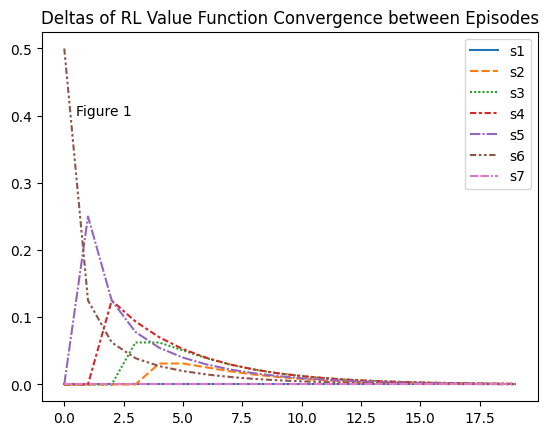

In [94]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.lineplot(Deltas)
plt.title('Deltas of RL Value Function Convergence between Episodes')
plt.text(0.5,0.4,'Figure 1')
plt.show()

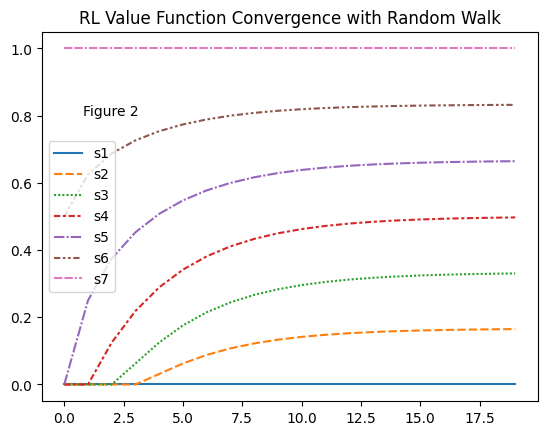

In [92]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.lineplot(Values)
plt.title('RL Value Function Convergence with Random Walk')
plt.text(0.8,0.8,'Figure 2')
plt.show()


## Interim Results of Value Function Convergence in Random Walk

We've been monitoring the evolution of the value function in a random walk environment across 20 episodes. The convergence pattern is becoming clear as depicted in the above visuals:


*Figure 1: Deltas between episodes show diminishing changes, indicating convergence.*

*Figure 2: The value function for each state increases over episodes, approaching stability.*

As we reached the end of Episode 19, we observed the following values for our states:

- Final Value Function: `[0.00, 0.165, 0.331, 0.497, 0.665, 0.832, 1.00]`
- Final Absolute Deltas: `[0.00, 0.00063, 0.00094, 0.00094, 0.00070, 0.00035, 0.00]`

These figures represent the state values at the end of our current episode. The deltas, or changes in value from the previous episode, have become quite small, especially for states closer to the goal state (s7), which demonstrates the expected trend of diminishing changes as the value function approaches convergence. The terminal state s7 maintains its fixed value of 1, as per the defined reward structure.

The corresponding array: `[0.165, 0.331, 0.497, 0.665, 0.832]` provides a snapshot of the non-terminal states' value function after 20 episodes, showing a clear progression towards the goal state's value.

In summary, the trend lines in both figures illustrate the algorithm's efficacy in refining the value estimates. We can anticipate that with additional episodes, the value function will further stabilize, reinforcing our understanding of the environment's dynamics.

The updated environment:

```javascript
0          0.165      0.331      0.497      0.665      0.832      1
s1 ------- s2 ------- s3 ------- s4 ------- s5 ------- s6 ------- s7
  |          |          |          |          |          |
 0.0       0.5        0.5        0.5        0.5        1.0
  |          |          |          |          |          |
  \____/   \____/   \____/   \____/   \____/   \____/
    50%       50%       50%       50%       50%       50%
```
<br><br>


### Interpretation of the Bellman Equation



$$
V(s) = R(s,a) + \gamma V(s')$$
$$V(s_{t-1}) = V(s_{t-1}) + \alpha  R(s_{t-1},a_t) + \gamma V(s_t) - V(s_{t-1})
$$




$ V(s)$ : This is the value function for the state $s$. It represents the expected return when starting from state 
$s $ and following a particular policy. In the ASCII environment and code, $V(s)$ corresponds to the values at each state $s1 $ through 
$s7$ for a particular episode. For example, after the final iteration for episode 19, $V(s2)=0.16478743$, $V(s3)=0.33051448$, and so on.

$R(s,a)$: This is the immediate reward received after taking action $a $in state $s$. Since the environment is a random walk with no immediate rewards except at the terminal states, $R(s,a)$ is effectively 0 for all non-terminal states. The only exception is when the terminal state 
$s7$ is reached, where $R(s7,a)$ would be 1 (as the reward for reaching the goal).


$γV(s′)$: This is the discounted value of the next state $s ′$ . Gamma ( $γ $) is the discount factor, and $V(s ′ )$ is the value of the next state after taking action $a $from state $s$. In the example, since gamma is set to 1 (indicating no discounting), this just becomes the value of the next state $V(s ′ )$. During the updates, each non-terminal state's value is updated as the average of its neighbors' values, mimicking the $γV(s ′ )$ part since $γ=1$.<br><br>



# Temporal Difference Learning (TD)
<br>

### Application of TD(0) to Random Walk Example

<br><br>




```python
Start
|
|---> Initialize Value Estimates (V)
|
|---> Set Learning Rate (alpha) and Discount Factor (gamma)
|
|---> For each episode (0 to 9):
|        |
|        | # Choose a random non-terminal state   
|                |        
|                |                     
|                |--->  state = np.random.choice(range(1, n+1))
|                |       
|                |        
|        | # While state is non-terminal:
|                |        
|                |                   
|                | --->  while 0 < state < n+1:
|                |        
|                |              
|                | # Determine the next state based on action: 
|                |        |
|                |        |             
|                |        | --->  next_state = state + action
|                |        |
|                |        |
|                | # If next state G(s7), assign reward  '1', otherwise '0':  
|                |        |
|                |        |            
|                |        | ---> reward = 0 if next_state != n+1 else 1
|                |        |
|                |        |
|                | # If next state G(s7), set future_value '0' for the TD update, otherwise V[next_state]
|                |        |
|                |        |             
|                |        | ---> future_value = 0 if next_state == n+1 else V[next_state]
|                |        |
|                |        |
|                | # Apply TD(0) update rule to V[state]
|                |        |
|                |        |              
|                |        | ---> V[state] += alpha * (reward + gamma * future_value - V[state])
|                |        |
|                |        |
|                | # Update the current state to next_state 
|                |        |
|                |        |             
|                |        | ---> state = next_state
|                |        |
|                |        |
|                | # if state is G, end episode
|
|---> After all episodes, output the final value function (V)
|
End

```



<br><br>

#### Tesing TD(0) with limited iterations and screen logs

In [100]:
import numpy as np

# Number of non-terminal states (excluding A and G)
n = 5
# Initialize value estimates with zeros
V = np.zeros(n + 2)
# Learning rate (alpha)
alpha = 0.5
# Discount factor (gamma)
gamma = 1.0




# Simulate multiple episodes
for episode in range(2):
    # Start from a random non-terminal state
    state = np.random.choice(range(1, n+1))

    print(f'episode: {episode}')
    print(f'state: {state}')
    print()
    
    # Simulate one step in the episode
    while 0 < state < n+1:
        # Choose action randomly: left (-1) or right (+1)
        action = np.random.choice([-1, 1])
        # Determine the next state
        next_state = state + action
        # Get reward: 0 for all transitions, except when moving to the terminal state G
        reward = 0 if next_state != n+1 else 1
        
        # Adjust V[next_state] for the terminal state G to be 0 for the purpose of future actions
        future_value = 0 if next_state == n+1 else V[next_state]
        
        # TD(0) update rule
        V[state] += alpha * (reward + gamma * future_value - V[state])
        
        # Debug prints to observe the process
        print(f'.......action: {action}')
        print(f'.......next_state: {next_state}')
        print(f'.......reward: {reward}')
        print(f'.......V[next_state]: {V[next_state]}')
        print(f'.......V[state]: {V[state]}')
        print()
        
        # Update the current state
        state = next_state

# The final value function after convergence
print("Value function after TD(0):", V)


episode: 0
state: 2

.......action: 1
.......next_state: 3
.......reward: 0
.......V[next_state]: 0.0
.......V[state]: 0.0

.......action: 1
.......next_state: 4
.......reward: 0
.......V[next_state]: 0.0
.......V[state]: 0.0

.......action: 1
.......next_state: 5
.......reward: 0
.......V[next_state]: 0.0
.......V[state]: 0.0

.......action: 1
.......next_state: 6
.......reward: 1
.......V[next_state]: 0.0
.......V[state]: 0.5

episode: 1
state: 2

.......action: -1
.......next_state: 1
.......reward: 0
.......V[next_state]: 0.0
.......V[state]: 0.0

.......action: -1
.......next_state: 0
.......reward: 0
.......V[next_state]: 0.0
.......V[state]: 0.0

Value function after TD(0): [0.  0.  0.  0.  0.  0.5 0. ]


### Extended TD(0) version with Convergence

In [152]:
import numpy as np

# Number of non-terminal states (excluding A and G)
n = 5
# Initialize value estimates with zeros
V = np.zeros(n + 2)
# Learning rate (alpha)
alpha = 0.5
# Discount factor (gamma)
gamma = 1.0


valuesTD=pd.DataFrame(columns=['s1','s2','s3', 's4','s5','s6', 's7'], index=range(30))

# Simulate multiple episodes
for episode in range(30):
    # Start from a random non-terminal state
    state = np.random.choice(range(1, n+1))
    
    # Simulate one step in the episode
    while 0 < state < n+1:
        # Choose action randomly: left (-1) or right (+1)
        action = np.random.choice([-1, 1])
        # Determine the next state
        next_state = state + action
        # Get reward: 0 for all transitions, except when moving to the terminal state G
        reward = 0 if next_state != n+1 else 1
        
        # Adjust V[next_state] for the terminal state G to be 0 for the purpose of future actions
        future_value = 0 if next_state == n+1 else V[next_state]
        
        # TD(0) update rule
        V[state] += alpha * (reward + gamma * future_value - V[state])
        
        # Update the current state
        state = next_state

    valuesTD.loc[episode] = V

# The final value function after convergence
print("Value function after TD(0):\n", V)

Value function after TD(0):
 [0.         0.24270922 0.57155398 0.75741547 0.91815427 0.9857718
 0.        ]


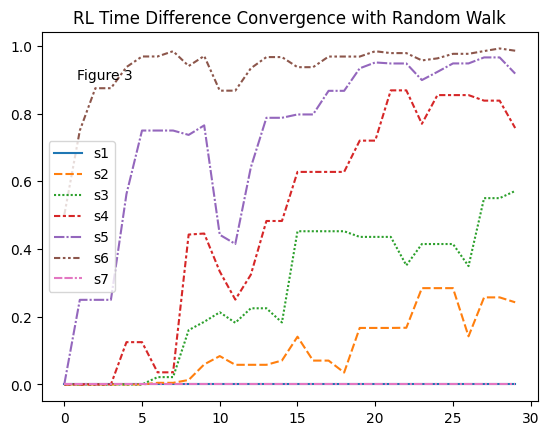

In [153]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.lineplot(valuesTD)
plt.title('RL Time Difference Convergence with Random Walk')
plt.text(0.8,0.9,'Figure 3')
plt.show()

#### Figure 3 a TD(0)?

Looking at the chart , we would analyze the convergence patterns in the context of this specific random walk setup. <br>
The graph should reflect the value updates according to the TD(0) algorithm's expectations:

- Fluctuations early on as the agent is still exploring the environment and learning
- A trend towards convergence as the episodes increase and the agent learns the optimal policy
- Higher state values closer to the terminal state G, reflecting the potential for reward

All three attributes are met in Figure 3. 
<br><br>
Unlike the value iteration, TD(0) results in a vector of expected values that zeros out the reward bearing termail values but similarly to the <br>
value iterations value vector, increases gradually toward the rewarding end of the terminals. <br><br>
Value function after TD(0):<br>
`[0.         0.24270922 0.57155398 0.75741547 0.91815427 0.9857718   0.        ]`
<br><br>